- Objetivo: Analisar a rede de transações financeiras entre um grupo de empresas.
- Dados: Criaremos dados fictícios de transações entre empresas.
- Análise: Calcularemos métricas de rede que indicam a influência e o papel de cada empresa na rede financeira.

### Etapas
- Criação de um Grafo Direcionado: Adicionamos empresas como nós e transações como arestas direcionadas com pesos que representam os valores das transações.
- Visualização com Matplotlib: Usamos matplotlib para visualizar o grafo, destacando as direções das transações e os valores transacionados.
- Cálculo de Métricas e Análise: Calculamos o grau de entrada (total recebido) e saída (total enviado) para cada empresa. Isso ajuda a identificar quais empresas são os principais receptores de fundos e quais são os principais pagadores na rede.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random


In [2]:
# Lista de empresas
companies = ['Empresa A', 'Empresa B', 'Empresa C', 'Empresa D', 'Empresa E', 'Empresa F', 'Empresa G', 'Empresa H', 'Empresa I', 'Empresa J']

In [3]:
# Criando um grafo direcionado
G = nx.DiGraph()

# Adicionando nós ao grafo
G.add_nodes_from(companies)

# Adicionando arestas com pesos aleatórios (representando valores de transações em milhares de dólares)
for _ in range(30):  # Criaremos 30 transações aleatórias
    src = random.choice(companies)
    dst = random.choice(companies)
    if src != dst:  # Evitar transações da empresa para ela mesma
        weight = random.randint(10, 500)  # Transações de 10k a 500k dólares
        G.add_edge(src, dst, weight=weight)

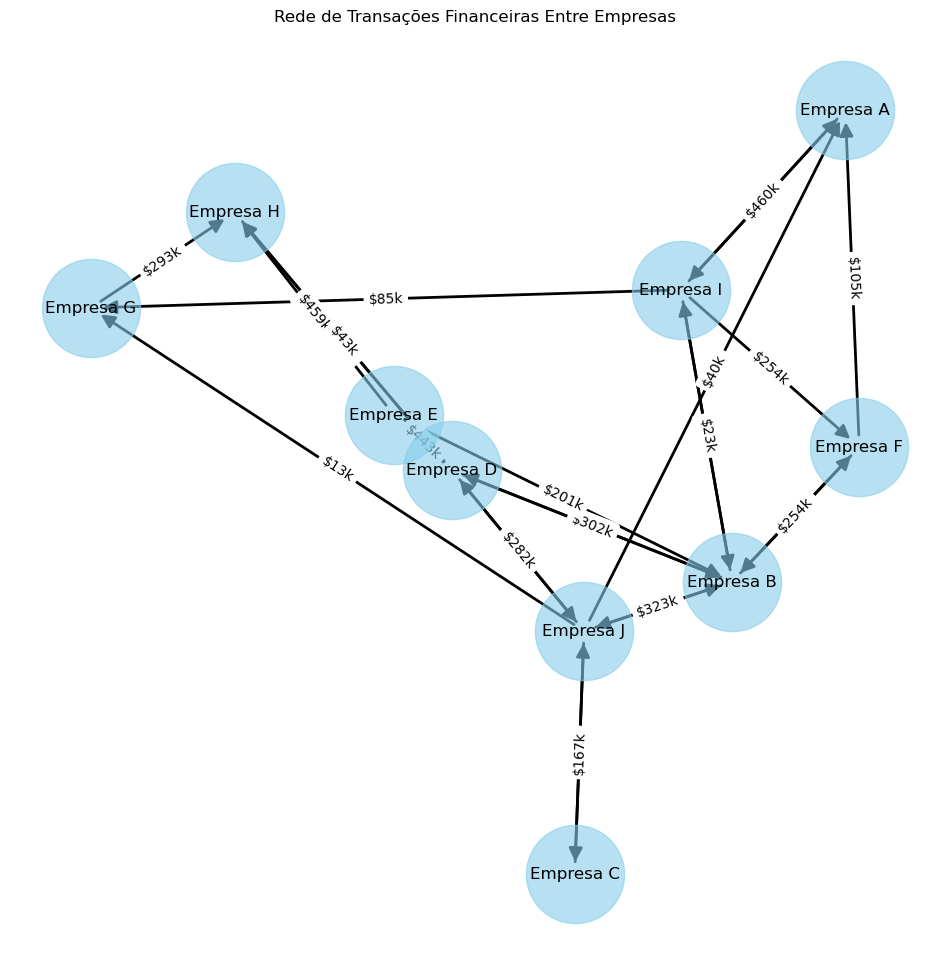

In [4]:
# Visualização do grafo com Matplotlib
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Layout para uma visualização consistente
edges = G.edges(data=True)
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=5000, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=12)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_cmap=plt.cm.Blues, width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"${d['weight']}k" for u, v, d in edges})
plt.title('Rede de Transações Financeiras Entre Empresas')
plt.axis('off')
plt.show()

In [5]:
# Cálculo de métricas
in_degree = G.in_degree(weight='weight')
out_degree = G.out_degree(weight='weight')
print("Total recebido por empresa (Grau de entrada):", dict(in_degree))
print("Total enviado por empresa (Grau de saída):", dict(out_degree))

Total recebido por empresa (Grau de entrada): {'Empresa A': 605, 'Empresa B': 1103, 'Empresa C': 167, 'Empresa D': 405, 'Empresa E': 443, 'Empresa F': 522, 'Empresa G': 98, 'Empresa H': 1131, 'Empresa I': 116, 'Empresa J': 494}
Total enviado por empresa (Grau de saída): {'Empresa A': 96, 'Empresa B': 507, 'Empresa C': 163, 'Empresa D': 1316, 'Empresa E': 660, 'Empresa F': 359, 'Empresa G': 293, 'Empresa H': 43, 'Empresa I': 822, 'Empresa J': 825}


In [6]:
# Identificando a empresa com o maior volume total de transações recebidas
most_receiving_company = max(in_degree, key=lambda x: x[1])
print(f"A empresa que mais recebeu foi {most_receiving_company[0]} com um total de ${most_receiving_company[1]}k.")


A empresa que mais recebeu foi Empresa H com um total de $1131k.
